# Playing around with Pittsburgh 311 Data

This is an example notebook that does some data exploration and takes advantage of some of the affordances of the Jupyter Notebook.

In [5]:
# use the %ls magic to list the files in the current directory.
%ls -l

total 680
drwxr-xr-x  5 jovyan users    170 Sep 29 15:39 data/
drwxr-xr-x 18 jovyan users    612 Apr 21 16:08 images/
-rwxr-xr-x  1 jovyan users 341925 Sep 29 15:52 pgh-311.ipynb*
-rwxr-xr-x  1 jovyan users    958 Sep 29 15:51 README.md*
-rwxr-xr-x  1 jovyan users     26 Apr 21 16:08 requirements.txt*
-rwxr-xr-x  1 jovyan users  38832 Apr 21 16:08 what-is-jupyter.ipynb*
-rwxr-xr-x  1 jovyan users 301167 Apr 21 16:08 what-is-jupyter.slides.html*


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Loading the Data into the Notebook environment

This notebook is going to play around with the [311 Data](https://data.wprdc.org/dataset/311-data) from the [Western Pennsylvania Regional Data Center](http://www.wprdc.org/)

I have taken the liberty of downloading the 311 data and putting it into the `data/` directory. If you want to look at or download the most recent data [visit the 311 data page on the WPRDC website](https://data.wprdc.org/dataset/311-data/resource/40776043-ad00-40f5-9dc8-1fde865ff571)

To explore the data we are going to use a python library called [Pandas](http://pandas.pydata.org/). If you are familiar with R, Pandas gives us a Dataframe-like interface to our data. If you aren't familiar with R, think of Pandas as a super powered spreadsheet (with a terrible graphical user interface). 

Pandas and Jupyter Notebooks are like peanut butter and jelly!

In [4]:
# load the data into memory in the three11s object
three11s = pd.read_csv("data/pgh-311.csv", parse_dates=['CREATED_ON'])

In [6]:
# inspect the data types of each column
three11s.dtypes

_id                               int64
REQUEST_ID                        int64
CREATED_ON               datetime64[ns]
REQUEST_TYPE                     object
REQUEST_ORIGIN                   object
DEPARTMENT                       object
NEIGHBORHOOD                     object
COUNCIL_DISTRICT                float64
WARD                            float64
TRACT                           float64
PUBLIC_WORKS_DIVISION           float64
PLI_DIVISION                    float64
POLICE_ZONE                     float64
FIRE_ZONE                        object
dtype: object

In [7]:
# inspect the first 5 rows of the dataframe, look at the pretty HTML
three11s.head()

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE
0,91230,100002,2016-08-26 14:07:00,Permit Parking (Residential Parking Permit),Call Center,Parking Authority,Bloomfield,7,9,42003090300,2,9,5,3-6
1,91374,100149,2016-08-28 07:23:00,Illegal Parking,Website,Police - Zones 1-6,Central Lawrenceville,7,9,42003090200,2,9,2,3-6
2,91731,100520,2016-08-29 13:43:00,Parking Authority,Call Center,Parking Authority,East Liberty,9,8,42003111500,2,8,5,3-8
3,91742,100532,2016-08-29 14:15:00,Paving Concern/Problem,Call Center,DPW - Asphalt,Beechview,4,19,42003192000,5,19,6,4-28
4,91820,100611,2016-08-29 16:01:00,Sewers,Call Center,Pittsburgh Water and Sewer Authority,Squirrel Hill South,5,14,42003141300,3,14,4,2-21


In [8]:
# inspect the data in the first row
three11s.loc[0]

_id                                                            91230
REQUEST_ID                                                    100002
CREATED_ON                                       2016-08-26 14:07:00
REQUEST_TYPE             Permit Parking (Residential Parking Permit)
REQUEST_ORIGIN                                           Call Center
DEPARTMENT                                         Parking Authority
NEIGHBORHOOD                                              Bloomfield
COUNCIL_DISTRICT                                                   7
WARD                                                               9
TRACT                                                    4.20031e+10
PUBLIC_WORKS_DIVISION                                              2
PLI_DIVISION                                                       9
POLICE_ZONE                                                        5
FIRE_ZONE                                                        3-6
Name: 0, dtype: object

## Embedded Plots

One of the advantages of the Notebook is the ability to embed charts and graphs into the document itself (alongside the code used to generate the chart). This means you can easily share and reproduce data visualizations.

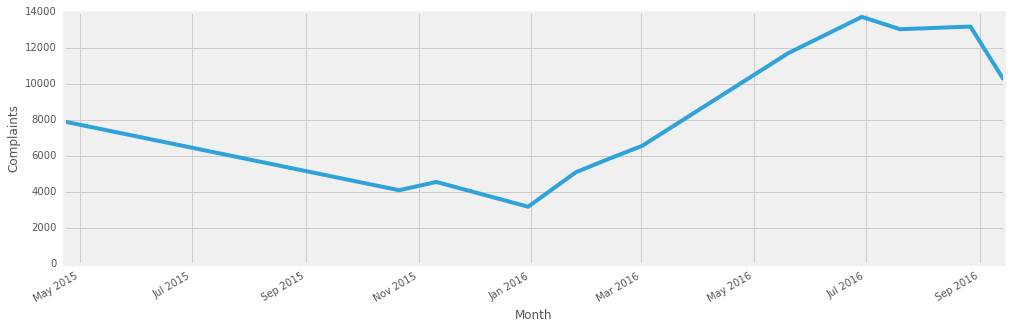

In [47]:
# Plot the total number of 311 requests per month

month_counts = three11s.groupby(three11s.CREATED_ON.dt.month)

y = month_counts.size()
x = month_counts.CREATED_ON.first()

axes = pd.Series(y.values, index=x).plot(figsize=(15,5))

plt.ylim(0)
plt.xlabel('Month')
plt.ylabel('Complaints')


## Diving Deeper into the Data: Exploring Request types

The plot above gave us a very high level view of the entire dataset. Now we are going to use the categorical data to slice and dice the data into smaller chunks.

In [12]:
# group the requests by type and display the number of requests per type
grouped_by_type = three11s.groupby(three11s.REQUEST_TYPE)

size = grouped_by_type.size()
size
#len(size)
#size[size > 200]


REQUEST_TYPE
911 Perfomance                                    6
Abandoned Vehicle (parked on street)           2444
Accessibility Construction Issue                 14
Alarm Permit                                      3
Americans with Disabilities                       5
Animal Waste                                    178
Barking Dog                                     224
Barricades                                      172
Basketball Hoop                                  38
Benefits                                          1
Bike Lane Bollard                                55
Bike Trail Maintenance                           52
Billing                                           3
Board Up (PLI referral to DPW)                  200
Boat/Trailer on Street                          104
Bollard Repair/Maintenance                       34
Brick/block or concrete slab repair             156
Bridge Maintenance                               16
Broken Sidewalk                                 786

There are too many request types, the request type isn't a granular enough category. We need some higher level categories to make this more comprehensible. Fortunately, there is an [Issue and Category codebook](https://data.wprdc.org/dataset/311-data/resource/40ddfbed-f225-4320-b4d2-7f1e09da72a4) that we can use to map between low and higher level categories.

In [13]:
# load the codebook
codebook = pd.read_csv('data/codebook.csv')
codebook.head()

,Category,Issue,Definition,Department
0,Accessibility,Americans with Disabilities,NaN,City Planning - Disabilities
1,Accessibility,City Facility,NaN,DPW - Facilities
2,Accessibility,"Handicap Ramp, Repair",NaN,DPW - Construction Division
3,Accessibility,"Handicap Ramp, Request for Installation",NaN,DPW - Transportation & Engineering
4,Accessibility,"Sidewalk, Lack of Snow/Ice Removal",NaN,311


In [18]:
# create a new dataframe with a new Category and Issue column
merged_311_data = pd.merge(three11s, 
                       codebook[['Category', 'Issue']], 
                       how='left',
                       left_on="REQUEST_TYPE", 
                       right_on="Issue")

In [19]:
# display the top 5 rows
merged_311_data.head()

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,Category,Issue
0,91230,100002,2016-08-26 14:07:00,Permit Parking (Residential Parking Permit),Call Center,Parking Authority,Bloomfield,7,9,42003090300,2,9,5,3-6,Permits,Permit Parking (Residential Parking Permit)
1,91374,100149,2016-08-28 07:23:00,Illegal Parking,Website,Police - Zones 1-6,Central Lawrenceville,7,9,42003090200,2,9,2,3-6,Parking,Illegal Parking
2,91731,100520,2016-08-29 13:43:00,Parking Authority,Call Center,Parking Authority,East Liberty,9,8,42003111500,2,8,5,3-8,Parking,Parking Authority
3,91742,100532,2016-08-29 14:15:00,Paving Concern/Problem,Call Center,DPW - Asphalt,Beechview,4,19,42003192000,5,19,6,4-28,Road/Street Issues,Paving Concern/Problem
4,91820,100611,2016-08-29 16:01:00,Sewers,Call Center,Pittsburgh Water and Sewer Authority,Squirrel Hill South,5,14,42003141300,3,14,4,2-21,Utility Issues,Sewers


In [20]:
# now group each request by their Category
grouped_by_type = merged_data.groupby(merged_311_data.Category)
size = grouped_by_type.size()
size

Category
Accessibility                                        358
Animal Issues                                       2648
Ask Us/General FAQs                                  470
Building Maintenance                                7236
Business Issues                                      751
City Facilities and Infrastructure                  1277
Communications (Cable, Website)                       43
Construction Issues                                 3782
Garbage and Litter Issues                           9014
Graffiti Issues                                      947
In database, but not on 311 Web Submission Form     3292
Neighborhood Issues                                10291
Parking                                             4878
Parks Issues                                        5249
Pedestrian/Bicycle Concerns                          236
Permits                                              710
Personnel (City)                                     122
Public Safety         

That is a more manageable list of categories for data visualization. Let's take a look at the distribution of requests per category in the dataset.

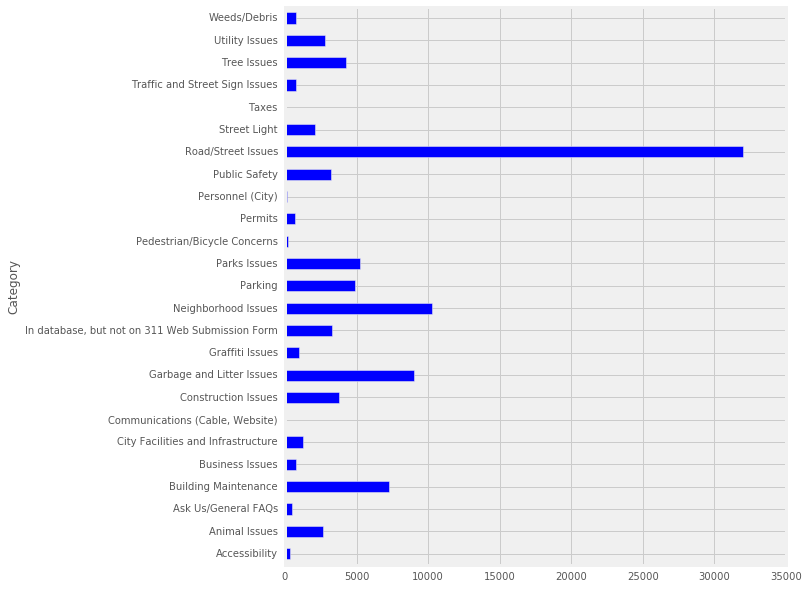

In [48]:
# plot the size graph
size.plot(kind='barh', figsize=(8,10))

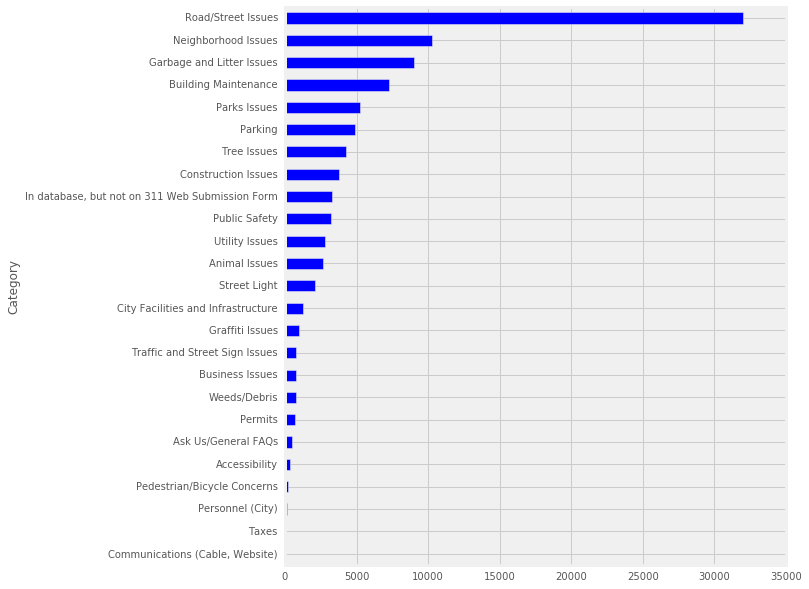

In [49]:
# plot the size graph, but this time with ordered data for more visual appeal
size.sort_values().plot(kind='barh', figsize=(8,10))

## Looking at requests at the neighborhood level


Thankfully, the 311 data from the WPRDC already includes neighborhood information for each request in the NEIGHBORHOOD column. We can take advantage of this to filter and count requests by neighborhood.

In [29]:

merged_311_data.groupby(merged_data.NEIGHBORHOOD).size().sort_values(inplace=False,
                                                         ascending=False)

NEIGHBORHOOD
Brookline                    4514
Carrick                      3998
South Side Slopes            3902
South Side Flats             3514
Squirrel Hill South          3284
Mount Washington             2869
Beechview                    2614
Bloomfield                   2605
Central Business District    2321
Sheraden                     2262
Greenfield                   2239
Shadyside                    2087
Central Lawrenceville        1999
Hazelwood                    1928
Lincoln-Lemington-Belmar     1911
East Liberty                 1854
Highland Park                1850
Knoxville                    1790
Marshall-Shadeland           1668
Elliott                      1648
Squirrel Hill North          1549
Brighton Heights             1542
Stanton Heights              1515
Perry North                  1496
Garfield                     1462
Homewood North               1437
Overbrook                    1437
Perry South                  1398
Point Breeze                 1369
H

In GRAPH form

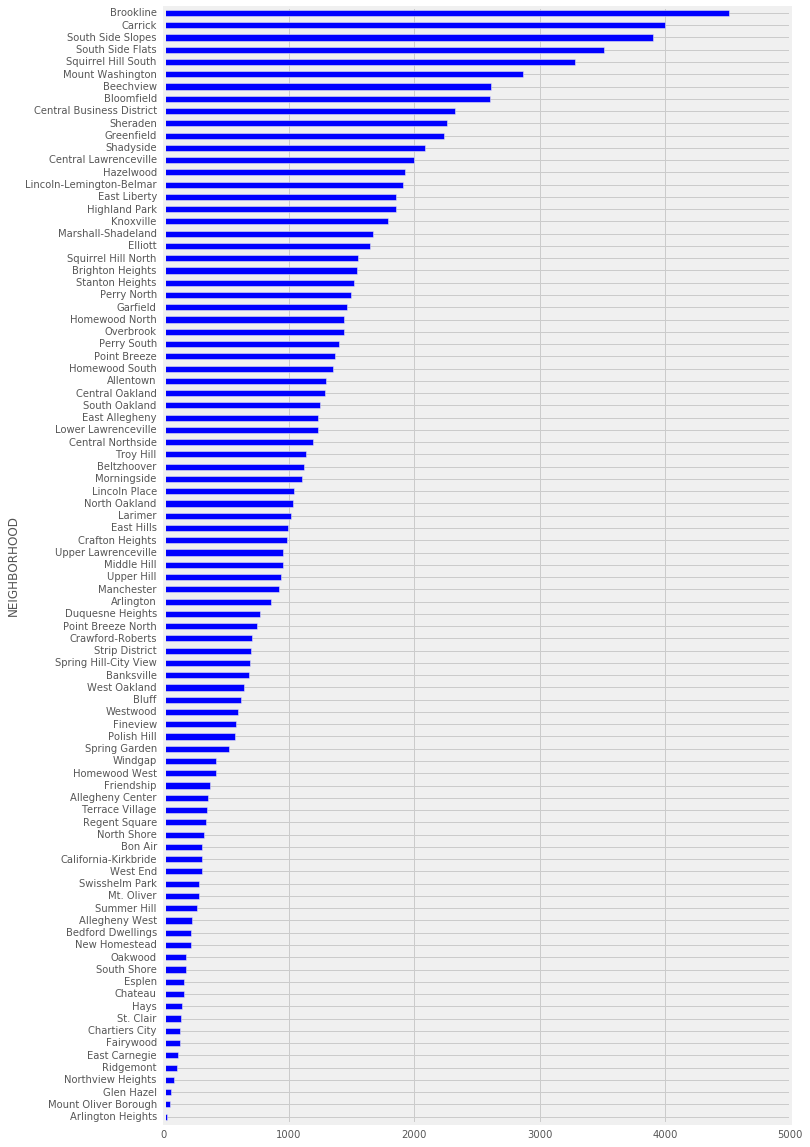

In [50]:
merged_311_data.groupby(merged_data.NEIGHBORHOOD).size().sort_values(inplace=False,
                                                         ascending=True).plot(kind="barh", figsize=(10,20))

So we can see from the graph above that Brookline, followed by the South Side Slopes, Carrick, and South Side Flats, make the most 311 requests. It would be interesting to get some neighborhood population data and compute the number of requests per capita. 

I bet those data are available, **maybe YOU could create that graph!**

## Widgets

Jupyter Notebooks have a very powerful [widget](https://github.com/ipython/ipywidgets) framework that allows you to easily add interactive components to live notebooks. 

In [51]:
# create a function that generates a chart of requests per neighborhood
def issues_by_neighborhood(neighborhood):
    """Generates a plot of issue categories by neighborhood"""
    grouped_by_type = merged_data[merged_data['NEIGHBORHOOD'] == neighborhood].groupby(merged_data.Category)
    size = grouped_by_type.size().sort_values()
    size.plot(kind='barh', figsize=(8,6))

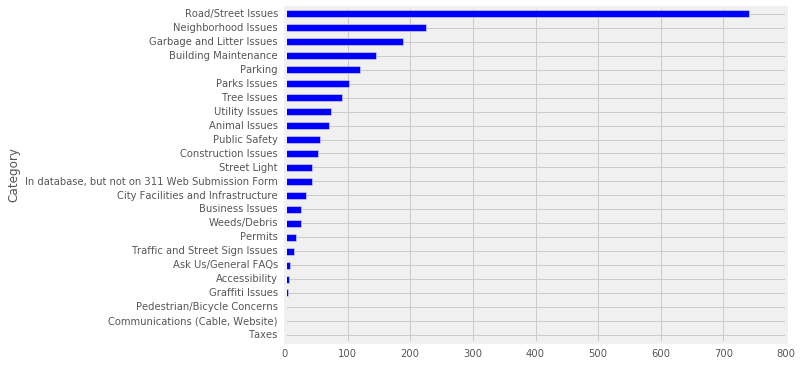

In [52]:
issues_by_neighborhood('Greenfield')

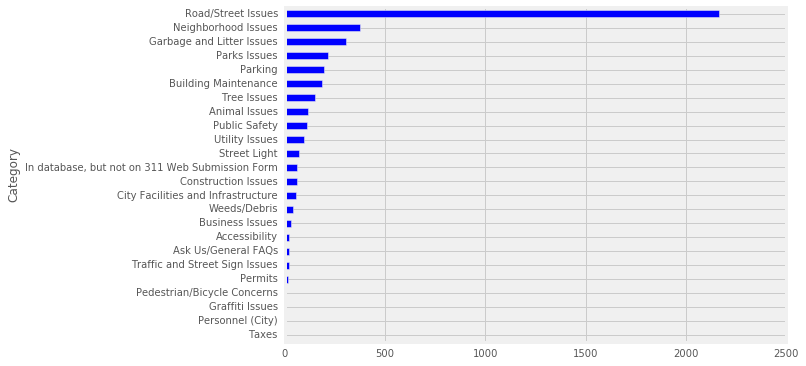

In [53]:
issues_by_neighborhood('Brookline')

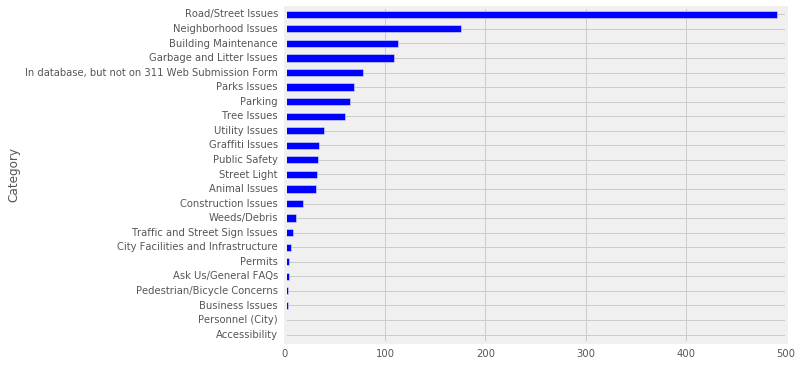

In [54]:
issues_by_neighborhood('Garfield')

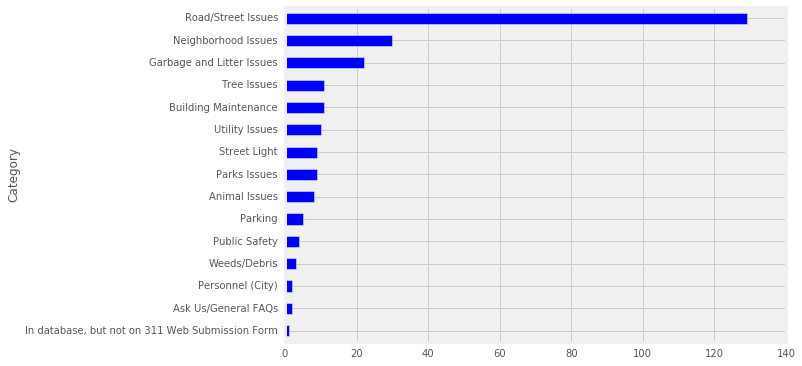

In [56]:
from ipywidgets import interact

@interact(hood=sorted(list(pd.Series(three11s.NEIGHBORHOOD.unique()).dropna())))
def issues_by_neighborhood(hood):
    """Generates a plot of issue categories by neighborhood"""
    grouped_by_type = merged_data[merged_data['NEIGHBORHOOD'] == hood].groupby(merged_data.Category)
    size = grouped_by_type.size().sort_values()
    size.plot(kind='barh',figsize=(8,6))

## Keep Exploring

- [Interactive spherical Voronoi diagram with Plotly](https://plot.ly/~empet/14000/plotly-interactive-spherical-voronoi-dia/)
- [A Gallery of Interesting Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)
- [Online Notebook Viewer](http://nbviewer.jupyter.org/)
- [Run the LIGO gravitational wave experiment LIVE](http://mybinder.org/repo/minrk/ligo-binder/GW150914_tutorial.ipynb)